# Create dataset

In this notebook, I create the final dataset. I perform the following steps:
- create 3 lists with search terms, ranging from broad to specific
- examine the results based on the search terms and choose a final search term list
- filter the full dataset based on the chosen search term list
- combine the dataset with MP information 

In [41]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read CSV file with complete dataset
df_full = pd.read_csv('dataset_unfiltered.csv', encoding='latin1')
df_full.head(10)


C:\Users\yasem\AppData\Local\Temp\ipykernel_28864\3381601532.py:2: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,27,28,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv('dataset_unfiltered.csv', encoding='latin1')


,id_fact,title.x,onderwerp.x,result_thema_1.x,zittingsjaar.x,naam_vragensteller.x,voornaam_vragensteller.x,id_vragensteller.x,bevraagde_minister_naam.x,bevraagde_minister_voornaam.x,...,result_thema_6,zittingsjaar.y,naam_vragensteller.y,voornaam_vragensteller.y,id_vragensteller.y,bevraagde_minister_naam.y,bevraagde_minister_voornaam.y,bevraagde_minister_id.y,soort_antwoord.y,tijdig.y
0,449662,Gemeentepersoneel - Minimumlengte,Gemeentepersoneel - Minimumlengte,NaN,BZ 1995,Van Cleuvenbergen,Riet,1888,Peeters,Leo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,449655,Taalgebruik - Sint-Genesius-Rode,Taalgebruik - Sint-Genesius-Rode,NaN,BZ 1995,Van Nieuwenhuysen,Luk,1907,Peeters,Leo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,449666,Export Plus Plan - Stand van zaken,Export Plus Plan - Stand van zaken,NaN,BZ 1995,Van Cleuvenbergen,Riet,1888,Van den Brande,Luc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,449689,Maagdentoren Zichem - Bescherming,Maagdentoren Zichem - Bescherming,NaN,BZ 1995,Kuijpers,Willy,1836,Baldewijns,Eddy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,449669,Promotie buitenlandse handel - Exportadviseurs,Promotie buitenlandse handel - Exportadviseurs,NaN,BZ 1995,Van Cleuvenbergen,Riet,1888,Van den Brande,Luc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,449690,Maagdentoren Zichem - Bescherming,Maagdentoren Zichem - Bescherming,NaN,BZ 1995,Kuijpers,Willy,1836,Martens,Luc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,449671,Vlabinvest - Nieuwe projecten,Vlabinvest - Nieuwe projecten,NaN,BZ 1995,Van Nieuwenhuysen,Luk,1907,Van den Brande,Luc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,449613,Voeren - Verbindingswegen met Nederland,Voeren - Verbindingswegen met Nederland,NaN,BZ 1995,Van Nieuwenhuysen,Luk,1907,Baldewijns,Eddy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,449656,Zandgroeve Bijvoorde - Vervuiling,Zandgroeve Bijvoorde - Vervuiling,NaN,BZ 1995,Verlinden,Mandus,1924,Kelchtermans,Theo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,449653,Aquafin - Werken in Galmaarden,Aquafin - Werken in Galmaarden,NaN,BZ 1995,Cardoen,Georges,1763,Kelchtermans,Theo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
encoding_list = ['ascii', 'big5', 'big5hkscs', 'cp037', 'cp273', 'cp424', 'cp437', 'cp500', 'cp720', 'cp737'
                 , 'cp775', 'cp850', 'cp852', 'cp855', 'cp856', 'cp857', 'cp858', 'cp860', 'cp861', 'cp862'
                 , 'cp863', 'cp864', 'cp865', 'cp866', 'cp869', 'cp874', 'cp875', 'cp932', 'cp949', 'cp950'
                 , 'cp1006', 'cp1026', 'cp1125', 'cp1140', 'cp1250', 'cp1251', 'cp1252', 'cp1253', 'cp1254'
                 , 'cp1255', 'cp1256', 'cp1257', 'cp1258', 'euc_jp', 'euc_jis_2004', 'euc_jisx0213', 'euc_kr'
                 , 'gb2312', 'gbk', 'gb18030', 'hz', 'iso2022_jp', 'iso2022_jp_1', 'iso2022_jp_2'
                 , 'iso2022_jp_2004', 'iso2022_jp_3', 'iso2022_jp_ext', 'iso2022_kr', 'latin_1', 'iso8859_2'
                 , 'iso8859_3', 'iso8859_4', 'iso8859_5', 'iso8859_6', 'iso8859_7', 'iso8859_8', 'iso8859_9'
                 , 'iso8859_10', 'iso8859_11', 'iso8859_13', 'iso8859_14', 'iso8859_15', 'iso8859_16', 'johab'
                 , 'koi8_r', 'koi8_t', 'koi8_u', 'kz1048', 'mac_cyrillic', 'mac_greek', 'mac_iceland', 'mac_latin2'
                 , 'mac_roman', 'mac_turkish', 'ptcp154', 'shift_jis', 'shift_jis_2004', 'shift_jisx0213', 'utf_32'
                 , 'utf_32_be', 'utf_32_le', 'utf_16', 'utf_16_be', 'utf_16_le', 'utf_7', 'utf_8', 'utf_8_sig']

for encoding in encoding_list:
    worked = True
    try:
        df_test = pd.read_csv('dataset_unfiltered.csv', encoding=encoding, nrows=5)
    except:
        worked = False
    if worked:
        print(encoding, ':\n', df_test.head())

cp437 :
    id_fact                                         title.x  \
0   449662               Gemeentepersoneel - Minimumlengte   
1   449655                Taalgebruik - Sint-Genesius-Rode   
2   449666              Export Plus Plan - Stand van zaken   
3   449689               Maagdentoren Zichem - Bescherming   
4   449669  Promotie buitenlandse handel - Exportadviseurs   

                                      onderwerp.x  result_thema_1.x  \
0               Gemeentepersoneel - Minimumlengte               NaN   
1                Taalgebruik - Sint-Genesius-Rode               NaN   
2              Export Plus Plan - Stand van zaken               NaN   
3               Maagdentoren Zichem - Bescherming               NaN   
4  Promotie buitenlandse handel - Exportadviseurs               NaN   

  zittingsjaar.x naam_vragensteller.x voornaam_vragensteller.x  \
0        BZ 1995    Van Cleuvenbergen                     Riet   
1        BZ 1995    Van Nieuwenhuysen                      

In [7]:
# read CSV file with complete dataset
df2 = pd.read_csv('dataset_unfiltered.csv', encoding='cp437')
df2.head(10)

C:\Users\yasem\AppData\Local\Temp\ipykernel_28864\1156976561.py:2: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,27,28,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('dataset_unfiltered.csv', encoding='cp437')


,id_fact,title.x,onderwerp.x,result_thema_1.x,zittingsjaar.x,naam_vragensteller.x,voornaam_vragensteller.x,id_vragensteller.x,bevraagde_minister_naam.x,bevraagde_minister_voornaam.x,...,result_thema_6,zittingsjaar.y,naam_vragensteller.y,voornaam_vragensteller.y,id_vragensteller.y,bevraagde_minister_naam.y,bevraagde_minister_voornaam.y,bevraagde_minister_id.y,soort_antwoord.y,tijdig.y
0,449662,Gemeentepersoneel - Minimumlengte,Gemeentepersoneel - Minimumlengte,NaN,BZ 1995,Van Cleuvenbergen,Riet,1888,Peeters,Leo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,449655,Taalgebruik - Sint-Genesius-Rode,Taalgebruik - Sint-Genesius-Rode,NaN,BZ 1995,Van Nieuwenhuysen,Luk,1907,Peeters,Leo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,449666,Export Plus Plan - Stand van zaken,Export Plus Plan - Stand van zaken,NaN,BZ 1995,Van Cleuvenbergen,Riet,1888,Van den Brande,Luc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,449689,Maagdentoren Zichem - Bescherming,Maagdentoren Zichem - Bescherming,NaN,BZ 1995,Kuijpers,Willy,1836,Baldewijns,Eddy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,449669,Promotie buitenlandse handel - Exportadviseurs,Promotie buitenlandse handel - Exportadviseurs,NaN,BZ 1995,Van Cleuvenbergen,Riet,1888,Van den Brande,Luc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,449690,Maagdentoren Zichem - Bescherming,Maagdentoren Zichem - Bescherming,NaN,BZ 1995,Kuijpers,Willy,1836,Martens,Luc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,449671,Vlabinvest - Nieuwe projecten,Vlabinvest - Nieuwe projecten,NaN,BZ 1995,Van Nieuwenhuysen,Luk,1907,Van den Brande,Luc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,449613,Voeren - Verbindingswegen met Nederland,Voeren - Verbindingswegen met Nederland,NaN,BZ 1995,Van Nieuwenhuysen,Luk,1907,Baldewijns,Eddy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,449656,Zandgroeve Bijvoorde - Vervuiling,Zandgroeve Bijvoorde - Vervuiling,NaN,BZ 1995,Verlinden,Mandus,1924,Kelchtermans,Theo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,449653,Aquafin - Werken in Galmaarden,Aquafin - Werken in Galmaarden,NaN,BZ 1995,Cardoen,Georges,1763,Kelchtermans,Theo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(df2)

185121

In [9]:
len(df_full)

185121

### Create lists of search terms

In [17]:
# 3 lists with search terms
list_broad = ["homo's",
               "homoseksueel",
               "homosexual",
               "homoseksuele",
               "homoseksualiteit",
               "antihomoseksueel",
               "homokoppel",
               "homohuwelijk",
               "homofobie",
               "homofoob",
               "homofobe",
               "homohaat",
               "seksuele geaardheid",
               "seksuele identiteit",
               "seksuele minderheid",
               "seksuele minderheden",
               "seksuele en genderminderheid",
               "homonegativiteit",
               "holebi",
               "holebiseksueel",
               "holebiseksuele",
               "holebigemeenschap",
               "heteroseksualiteit",
               "heteroseksisme",
               "heterokoppel",
               "lesbisch",
               "lesbian",
               "lesbienne",
               "biseksueel",
               "bisexual",
               "biseksualiteit",
               "gay",
               "queer",
               "LGBT"]
               
list_intermediate = ["homo's",
               "homoseksueel",
               "homosexual",
               "homoseksuele",
               "homoseksualiteit",
               "antihomoseksueel",
               "homokoppel",
               "homohuwelijk",
               "homofobie",
               "homofoob",
               "homofobe",
               "homohaat",
               "seksuele geaardheid",
               "seksuele identiteit",
               "seksuele minderheid",
               "seksuele minderheden",
               "seksuele en genderminderheid",
               "homonegativiteit",
               "holebi",
               "holebiseksueel",
               "holebiseksuele",
               "holebigemeenschap",
               "heteroseksualiteit",
               "heteroseksisme",
               "heterokoppel",
               "lesbisch",
               "lesbian",
               "lesbienne",
               "biseksueel",
               "bisexual",
               "biseksualiteit",
               "gay",
               "queer",
               "LGBT", 
                      "transgender",
                      "transgenderisme",
                      "trans personen",
                      "transgenders",
                      "transseksualiteit",
                      "transfobie",
                      "transfoob",
                      "transfobe",
                      "holebitrans",
                      "intersekse", 
                      "interseksualiteit",
                      "geslachtsverandering",
                      "geslachtstransformatie",
                      "gendertransitie",
                      "gendertransformatie",
                      "LHBT",
                      "GLBT",
                      "GLBQ",
                      "GLBTQ",
                      "LGB",
                      "LGBTQ",
                      "LGBTI",
                      "LGBTIQ",
                      "LGBTQI",
                      "LGBTQIA",
                      "heteroflexibel",
                      "transvrouw",
                      "transman",
                      "trans man",
                      "trans vrouw",
                      "trans mannen",
                      "trans vrouwen",
                      "niet-binaire persoon",
                      "niet-binaire personen",
                      "niet-binaire mensen"]

  
list_specific = ["homo's",
               "homoseksueel",
               "homosexual",
               "homoseksuele",
               "homoseksualiteit",
               "antihomoseksueel",
               "homokoppel",
               "homohuwelijk",
               "homofobie",
               "homofoob",
               "homofobe",
               "homohaat",
               "seksuele geaardheid",
               "seksuele identiteit",
               "seksuele minderheid",
               "seksuele minderheden",
               "seksuele en genderminderheid",
               "homonegativiteit",
               "holebi",
               "holebiseksueel",
               "holebiseksuele",
               "holebigemeenschap",
               "heteroseksualiteit",
               "heteroseksisme",
               "heterokoppel",
               "lesbisch",
               "lesbian",
               "lesbienne",
               "biseksueel",
               "bisexual",
               "biseksualiteit",
               "gay",
               "queer",
               "LGBT", 
                      "transgender",
                      "transgenderisme",
                      "trans personen",
                      "transgenders",
                      "transseksualiteit",
                      "transfobie",
                      "transfoob",
                      "transfobe",
                      "holebitrans",
                      "intersekse", 
                      "interseksualiteit",
                      "geslachtsverandering",
                      "geslachtstransformatie",
                      "gendertransitie",
                      "gendertransformatie",
                      "LHBT",
                      "GLBT",
                      "GLBQ",
                      "GLBTQ",
                      "LGB",
                      "LGBTQ",
                      "LGBTI",
                      "LGBTIQ",
                      "LGBTQI",
                      "LGBTQIA",
                      "heteroflexibel",
                      "transvrouw",
                      "transman",
                      "trans man",
                      "trans vrouw",
                      "trans mannen",
                      "trans vrouwen",
                      "niet-binaire persoon",
                      "niet-binaire personen",
                      "niet-binaire mensen", 
                  "cisgender", 
                  "holebifederatie", 
                  "çavaria", 
                  "Roze Zaterdag",
                  "heteronormativiteit",
                  "gendernonconformiteit",
                  "genderconformiteit", 
                  "genderdysforie",
                  "homosueel", 
                  "regenboog vlag",
                  "Antwerp Pride",
                  "Brussels Pride",
                  "Ghent Pride"]



 ### Results based on search term lists

In [18]:
# regex pattern from the search terms
pattern1 = '|'.join(list_broad)
pattern2 = '|'.join(list_intermediate)
pattern3 = '|'.join(list_specific)

# filter the dataset based on search terms
df_broad = df_full[df_full['text'].str.contains(pattern1, case=False, na=False, regex=True)]
df_intermediate = df_full[df_full['text'].str.contains(pattern2, case=False, na=False, regex=True)]
df_specific = df_full[df_full['text'].str.contains(pattern3, case=False, na=False, regex=True)]


In [23]:
# size of the datasets
len(df_specific)


987

In [28]:
df_specific = pd.DataFrame(df_specific)
df_broad = pd.DataFrame(df_broad)
df_intermediate = pd.DataFrame(df_intermediate)

# Save the dataframe to a CSV file
df_specific.to_csv('df_specific.csv', index=False)
df_broad.to_csv('df_broad.csv', index=False)
df_intermediate.to_csv('df_intermediate.csv', index=False)

In [33]:
df_specific = pd.read_csv('df_specific.csv')

In [38]:
unique_values = df_specific['result_thema_1.x'].unique()
unique_values

array([nan, 'Gelijke Kansen', 'Cultuur', 'Armoedebeleid', 'Gezondheid',
       'Lokale Overheden', 'Werk', 'Natuur en Milieu',
       'Vlaamse Administratie', 'Mobiliteit en Verkeer',
       'Welzijn en Gezin', 'Sport', 'Onderwijs en Vorming', 'Begroting',
       'Media', 'Landbouw en Visserij', 'Vlaamse Regering', 'Toerisme',
       'Brussel en de Vlaamse Rand', 'Buitenlands Beleid',
       'Europese instellingen', 'Wonen', 'Ontwikkelingssamenwerking',
       'Wetenschap en Innovatie', 'Economie', 'Jeugdwerk', 'Inburgering',
       'Ruimtelijke ordening', 'Internationaal Ondernemen',
       'Onroerend Erfgoed', 'Justitie', 'Openbare werken'], dtype=object)

In [42]:
df_specific.hist(column='result_thema_1.x', grid=False)

ValueError: hist method requires numerical or datetime columns, nothing to plot.

<Axes: xlabel='result_thema_1.x'>

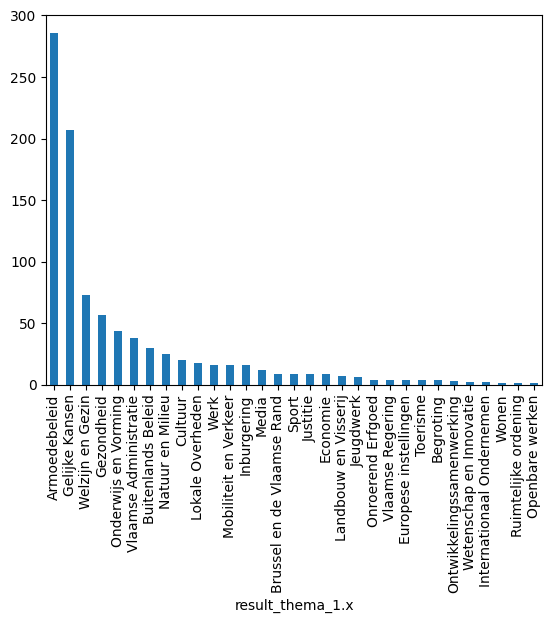

In [43]:
df_specific['result_thema_1.x'].value_counts().plot(kind='bar')